# Produce metadata spreadsheet and generate randomization scheme

## Produce initial metadata spreadsheet

An example of a metadata spreadsheet for one experiment is provided as `1-IN_example_metadata.csv`.

The columns of this sheet can be in any order. There are three essential columns that must be named specifically as `Genotype_ID`, `Block` and `Treatment`. If there is only one value for any of these columns, this is fine; just put the same value for every row.

The user has the flexibility to include any other desired columns in this spreadsheet. Doing so will not affect the randomization scheme or downstream analysis.

This file should be saved as a `csv`.<br><br>
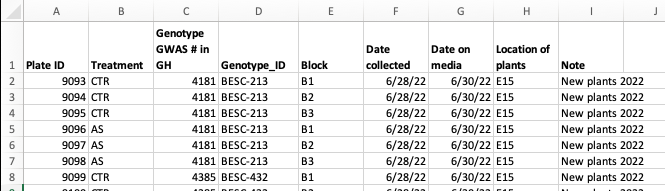

## Generate randomization scheme and produce new version of spreadsheet specifying plate position and order

In the Strauss lab, we use a code of 3-5 capital letters to refer to each experiment or experimental phase consisting of samples imaged on the same day.

In [1]:
experiment_ID <- "GTOOO"
file_path <- "1-IN_example_metadata.csv"

In [2]:
library(data.table)
library(gdata)
library(dplyr)
library(tools)

gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.



gdata: read.xls support for 'XLSX' (Excel 2007+) files ENABLED.


Attaching package: ‘gdata’


The following objects are masked from ‘package:data.table’:

    first, last


The following object is masked from ‘package:stats’:

    nobs


The following object is masked from ‘package:utils’:

    object.size


The following object is masked from ‘package:base’:

    startsWith



Attaching package: ‘dplyr’


The following objects are masked from ‘package:gdata’:

    combine, first, last


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




This function will produce a pseudo-randomized order for samples, in which the order of genotypes is randomized, but samples with the same genotype and different treatments are kept adjacent, and blocks/dates are kept separate.

In [3]:
set.seed(2)

In [4]:
randomize <- function(file_path){
  # load input data
  geno.list <- as.data.frame(fread(file_path))
  # prepare data table to which output is added
  master_out <- data.table()
  
# partition by date -------------------------------------------------------
  for (date in levels(factor(geno.list$`Date collected`))){

    plates.on.this.date <- (subset(geno.list,
                                   geno.list$`Date collected` == date))
    shuffled.order.plates.on.this.date <- sample(unique(plates.on.this.date$Genotype_ID))
    
# statements --------------------------------------------------------------
    print(date)
    print("Desired order:")
    print(shuffled.order.plates.on.this.date)
    print("Order before:")
    print(plates.on.this.date$Genotype_ID)
    print("Rows before:")
    print(nrow(plates.on.this.date))
    cat("\n")
    
    
# partition by block, shuffle and recombine into output -------------------
    for (block in levels(factor(plates.on.this.date$Block))){
      plates.on.this.date.block <- subset(plates.on.this.date,
                                          plates.on.this.date$Block == block)
      plates.on.this.date.block$Genotype_ID <- reorder.factor(plates.on.this.date.block$Genotype_ID,
                                                              new.order = shuffled.order.plates.on.this.date)
      plates.on.this.date.block <- plates.on.this.date.block[order(plates.on.this.date.block$Genotype_ID),]
      master_out <- rbind(master_out,
                          plates.on.this.date.block)

# statements --------------------------------------------------------------
      print(block)
      print("Order after:")
      print(plates.on.this.date.block$Genotype_ID)
      print("Rows after:")
      print(nrow(plates.on.this.date.block))
      cat("\n\n")
      
      
# add randomization # and save output -------------------------------------
    }
  }
  
  master_out$`Randomized #` <- seq.int(nrow(master_out))
  
  return(master_out)
}

In [5]:
master_out <- randomize(file_path)

[1] "6/28/22"
[1] "Desired order:"
 [1] "KTMC-12-1" "BESC-463"  "MTSM-27-3" "BESC-455"  "NHTB-27-3" "BESC-213" 
 [7] "BESC-223"  "YALD-27-5" "BESC-432"  "BESC-899"  "BESC-1236" "BESC-893" 
[13] "BESC-227"  "GW-9816"   "BESC-394"  "BESC-63"  
[1] "Order before:"
 [1] "BESC-213"  "BESC-213"  "BESC-213"  "BESC-213"  "BESC-213"  "BESC-213" 
 [7] "BESC-432"  "BESC-432"  "BESC-432"  "BESC-432"  "BESC-432"  "BESC-432" 
[13] "BESC-899"  "BESC-899"  "BESC-899"  "BESC-899"  "BESC-899"  "BESC-899" 
[19] "GW-9816"   "GW-9816"   "GW-9816"   "GW-9816"   "GW-9816"   "GW-9816"  
[25] "KTMC-12-1" "KTMC-12-1" "KTMC-12-1" "KTMC-12-1" "KTMC-12-1" "KTMC-12-1"
[31] "MTSM-27-3" "MTSM-27-3" "MTSM-27-3" "MTSM-27-3" "MTSM-27-3" "MTSM-27-3"
[37] "BESC-893"  "BESC-893"  "BESC-893"  "BESC-893"  "BESC-893"  "BESC-893" 
[43] "NHTB-27-3" "NHTB-27-3" "NHTB-27-3" "NHTB-27-3" "NHTB-27-3" "NHTB-27-3"
[49] "YALD-27-5" "YALD-27-5" "YALD-27-5" "YALD-27-5" "YALD-27-5" "YALD-27-5"
[55] "BESC-1236" "BESC-1236" "BESC-1236" "BES

In [6]:
master_out$`Image#` <- rep(1:21, (nrow(master_out)/21))[1:nrow(master_out)]

In [7]:
n_trays <- ceiling(nrow(master_out) / 21)

In [8]:
experiment_ID_vector <- rep(experiment_ID, 21*n_trays)

In [9]:
tray_IDs <- rep(rep(1:n_trays), 21)

tray_IDs <- tray_IDs[order(tray_IDs)]

#tray_IDs

In [10]:
full_tray_IDs <- paste0(experiment_ID_vector, tray_IDs)

In [11]:
master_out$Tray_ID <- full_tray_IDs[1:nrow(master_out)]

In [12]:
setcolorder(master_out, c("Image#", "Tray_ID"))

In [13]:
head(master_out, 25)

Image#,Tray_ID,Plate ID,Treatment,Genotype GWAS # in GH,Genotype_ID,Block,Date collected,Date on media,Location of plants,Note,Randomized #
<int>,<chr>,<int>,<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,GTOOO1,9117,CTR,4902,KTMC-12-1,B1,6/28/22,6/30/22,E15,New plants 2022,1
2,GTOOO1,9120,AS,4902,KTMC-12-1,B1,6/28/22,6/30/22,E15,New plants 2022,2
3,GTOOO1,9177,CTR,4413,BESC-463,B1,6/28/22,6/30/22,E14,New plants 2022,3
4,GTOOO1,9180,AS,4413,BESC-463,B1,6/28/22,6/30/22,E14,New plants 2022,4
5,GTOOO1,9123,CTR,4928,MTSM-27-3,B1,6/28/22,6/30/22,E15,New plants 2022,5
6,GTOOO1,9126,AS,4928,MTSM-27-3,B1,6/28/22,6/30/22,E15,New plants 2022,6
7,GTOOO1,9171,CTR,4404,BESC-455,B1,6/28/22,6/30/22,E14,New plants 2022,7
8,GTOOO1,9174,AS,4404,BESC-455,B1,6/28/22,6/30/22,E14,New plants 2022,8
9,GTOOO1,9135,CTR,4934,NHTB-27-3,B1,6/28/22,6/30/22,E15,New plants 2022,9


In [14]:
filepath_out <- paste0(file_path_sans_ext(file_path),
                         "_randomized.csv")

In [15]:
filepath_out <- gsub("1-IN", "1-OUT", filepath_out)

In [16]:
filepath_out

[1] "1-OUT_example_metadata_randomized.csv"

In [17]:
fwrite(as.data.table(master_out),
       filepath_out)